# **MODELISATION**




**Importation des packages**

In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.preprocessing import StandardScaler

Importation des donn√©es

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/OusseynouDIOP16/IML_STUDENT_PERFORMANCE/main/data_clean.csv", sep=",")
data.shape  # data frame dimensions (nb rows, nb columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hours_Studied                       6607 non-null   float64
 1   Attendance                          6607 non-null   int64  
 2   Sleep_Hours                         6607 non-null   int64  
 3   Previous_Scores                     6607 non-null   int64  
 4   Tutoring_Sessions                   6607 non-null   float64
 5   Physical_Activity                   6607 non-null   int64  
 6   Exam_Score                          6607 non-null   float64
 7   Access_to_Resources_Encoded         6607 non-null   int64  
 8   Parental_Involvement_Encoded        6607 non-null   int64  
 9   Motivation_Level_Encoded            6607 non-null   int64  
 10  Family_Income_Encoded               6607 non-null   int64  
 11  Teacher_Quality_Encoded             6607 no

**D√©finition des donn√©es d'entrainement et donn√©es test**

In [4]:
# Liste des variables explicatives
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
            'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Encoded',
            'Access_to_Resources_Encoded', 'Motivation_Level_Encoded', 'Family_Income_Encoded',
            'Teacher_Quality_Encoded', 'Extracurricular_Activities_Encoded',
            'Internet_Access_Encoded', 'Learning_Disabilities_Encoded',
            'School_Type_Encoded', 'Peer_Influence_Encoded',
            'Parental_Education_Level_Encoded', 'Distance_from_Home_Encoded', 'Gender_Encoded']

# Variable cible
target = 'Exam_Score'

# S√©paration des variables X (features) et y (target)
X = data[features]  # Variables explicatives
y = data[target]    # Variable cible

# V√©rification des premi√®res lignes des deux DataFrames
print("Variables explicatives X :\n", X.head())
print("\nVariable cible y :\n", y.head())

Variables explicatives X :
    Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0           23.0          84            7               73                0.0   
1           19.0          64            8               59                2.0   
2           24.0          98            7               91                2.0   
3           29.0          89            8               98                1.0   
4           19.0          92            6               65                3.0   

   Physical_Activity  Parental_Involvement_Encoded  \
0                  3                             1   
1                  4                             1   
2                  4                             2   
3                  4                             1   
4                  4                             2   

   Access_to_Resources_Encoded  Motivation_Level_Encoded  \
0                            3                         1   
1                            2          

In [5]:
# 20% des donn√©es dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #ramdom_state tr√©s important

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (5285, 19) ; y: (5285,) 
Test set - X: (1322, 19) ; y: (1322,)


# **STANDARDISATION**

In [6]:

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation sur X_train et X_test
X_train_std = scaler.fit_transform(X_train)  # Calcul et transformation sur le train
X_test_std= scaler.transform(X_test)       # Transformation du test avec les m√™mes param√®tres

In [7]:
# Initialiser le scaler
y_scaler = StandardScaler()

# Reshaper les donn√©es en utilisant .values pour obtenir un array NumPy
y_train= y_scaler.fit_transform(y_train.values.reshape(-1, 1))  # Standardisation sur le train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))  # Application sur le test

# V√©rification des r√©sultats
print("Moyenne de y_train_scaled :", y_train.mean())
print("√âcart-type de y_train_scaled :", y_test.std())

Moyenne de y_train_scaled : -1.1431200777294705e-15
√âcart-type de y_train_scaled : 1.0109840800796572


# **Mod√®le 1 : Regression lineare multiple**



In [8]:
# On cr√©e un mod√®le de r√©gression lin√©aire
rlm = linear_model.LinearRegression()

# On entra√Æne ce mod√®le sur les donn√©es d'entrainement
rlm.fit(X_train, y_train)

# On r√©cup√®re l'erreur de norme 2 sur le jeu de donn√©es test comme baseline
rlm_error = np.mean((rlm.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(f"Erreur quadratrique: {rlm_error}")
score=rlm.score(X_train, y_train)
print (f"Score: {score}")

Erreur quadratrique: 0.09171745599383915
Score: 0.9044603626839474


D√©terminon B0 et les poids des variables explicatives


In [9]:
print("Intercept:", rlm.intercept_)
print("Coefficients:", rlm.coef_)
coefficients = rlm.coef_

Intercept: [-10.62028326]
Coefficients: [[ 8.48274750e-02  5.87916773e-02  2.28899972e-03  1.45302738e-02
   1.41511444e-01  6.30104906e-02  2.83535574e-01  2.93407497e-01
   1.49466077e-01  1.36907803e-01  1.41877113e-01  1.44467133e-01
   2.96141023e-01 -2.63871726e-01 -2.65607656e-04  1.48152337e-01
   1.50475938e-01 -1.32978986e-01 -9.81998826e-03]]


# **Pr√©diction**

In [10]:
y_train_pred = rlm.predict(X_train)
y_test_pred = rlm.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
score_test=rlm.score(X_test, y_test)
print (f"Score test: {score_test}")

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")


Score test: 0.9102646902296295
Train MSE: 0.0955396373160527, Test MSE: 0.09171745599383915


les deux MSE sont proches, ce qui sugg√®re que le mod√®le est bien √©quilibr√©.

In [12]:
train_r2 = rlm.score(X_train, y_train)
test_r2 = rlm.score(X_test, y_test)

print(f"Train R¬≤: {train_r2}, Test R¬≤: {test_r2}")


Train R¬≤: 0.9044603626839474, Test R¬≤: 0.9102646902296295


**Analyse des r√©sidus**

Analyse des R√©sidus pour v√©rifier si les hypoth√®ses de la r√©gression lin√©aire sont respect√©es :

*   Les r√©sidus doivent suivre une distribution normale.

*   Ils doivent √™tre ind√©pendants
*   Ils doivent avoir une variance constante (homosc√©dasticit√©).

.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


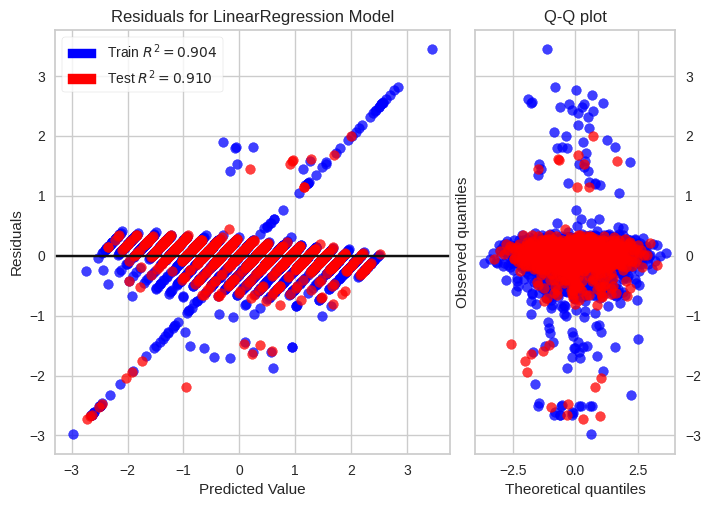

<Figure size 800x550 with 0 Axes>

In [13]:
from yellowbrick.regressor import ResidualsPlot
res_viz = ResidualsPlot(rlm,
                        is_fitted="auto",
                        qqplot=True,
                        hist=False,
                        train_color="blue",
                        test_color="red",
                       )
res_viz.fit(X_train, y_train)
res_viz.score(X_test, y_test)
res_viz.show(clear_figure=True);

**Hypoth√®se** : Les r√©sidus doivent √™tre r√©partis al√©atoirement autour de 0 (pas de structure discernable).

Analyse (graphe de gauche - R√©sidus vs Valeurs Pr√©dites) :

Les r√©sidus semblent √™tre r√©partis autour de la ligne 0, ce qui sugg√®re une relation lin√©aire raisonnable.
Cependant, il existe quelques valeurs aberrantes en bas (-3 et 3), ce qui pourrait indiquer des observations influentes.

**Conclusion** :
‚úîÔ∏è Hypoth√®se de lin√©arit√© globalement v√©rifi√©e, bien que des points aberrants soient pr√©sents.


**Hypoth√®se** : La variance des r√©sidus doit √™tre constante pour toutes les valeurs pr√©dites (pas de c√¥ne ou de motif discernable).

Analyse (graphe de gauche) :

Les r√©sidus sont proches de 0 pour la plupart des pr√©dictions, mais il  y a une l√©g√®re augmentation de la dispersion pour les pr√©dictions extr√™mes (surtout pour les petites valeurs).
Cela pourrait indiquer une l√©g√®re h√©t√©rosc√©dasticit√©.

**Conclusion :**
‚ö†Ô∏è Hypoth√®se partiellement v√©rifi√©e, mais une l√©g√®re h√©t√©rosc√©dasticit√© est pr√©sente.

**Hypoth√®se :** Les r√©sidus doivent suivre une distribution normale

Analyse (Q-Q Plot - graphe de droite) :

Les points suivent une ligne droite au centre du graphe, ce qui sugg√®re une bonne normalit√© pour les valeurs centrales.
Cependant, aux extr√©mit√©s (queues de la distribution), on observe des √©carts significatifs.

**Conclusion :**
‚ö†Ô∏è Hypoth√®se partiellement v√©rifi√©e, mais des √©carts aux extr√©mit√©s montrent une non-normalit√© des r√©sidus.

### **Normalit√©**

Une `p-value < alpha` (5%, en g√©n√©ral) pour le test d'Anderson-Darling indique que l'hypoth√®se nulle de normalit√© de la distribution des r√©sidus est rejet√©e

**Hypoth√®ses du test :**

H‚ÇÄ (Hypoth√®se nulle) : Les r√©sidus suivent une distribution normale.

H‚ÇÅ (Hypoth√®se alternative) : Les r√©sidus ne suivent pas une distribution normale.

**p-value :**

Si la p-value > 0.05 : On accepte H‚ÇÄ, les r√©sidus suivent une distribution normale.

Si la p-value ‚â§ 0.05 : On rejette H‚ÇÄ, les r√©sidus ne suivent pas une distribution normale.


In [14]:
from scipy.stats import normaltest

# Importer le module pour le test d'Anderson-Darling
from statsmodels.stats.diagnostic import normal_ad

# Calcul des r√©sidus (diff√©rence entre les valeurs observ√©es et pr√©dites)
residuals = y_train - y_train_pred

# Appliquer le test sur les r√©sidus
ad_stat, p_value = normal_ad(residuals)

# Afficher les r√©sultats
print("La statistique d'Anderson-Darling vaut :", ad_stat)
print("La p-value du test d'Anderson-Darling vaut :", p_value)

# Interpr√©tation
if p_value > 0.05:
    print("Les r√©sidus suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les r√©sidus ne suivent pas une distribution normale (on rejette H0).")




La statistique d'Anderson-Darling vaut : [inf]
La p-value du test d'Anderson-Darling vaut : 0.0
Les r√©sidus ne suivent pas une distribution normale (on rejette H0).


## **Homoscedasticite**

**Hypoth√®ses du test :**

H‚ÇÄ (Hypoth√®se nulle) : Les r√©sidus sont homosc√©dastiques (la variance est constante).

H‚ÇÅ (Hypoth√®se alternative) : Les r√©sidus sont h√©t√©rosc√©dastiques (la variance n'est pas constante).

In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Ajouter une constante √† X_train pour inclure l'ordonn√©e √† l'origine dans le test
X_train_with_const = sm.add_constant(X_train)

# Appliquer le test de White
white_test_stat, white_p_value, _, _ = het_white(residuals, X_train_with_const)

# Afficher les r√©sultats
print("Statistique du test de White:", white_test_stat)
print("p-value du test de White:", white_p_value)

# Interpr√©tation
if white_p_value > 0.05:
    print("Il n'y a pas d'h√©t√©rosc√©dasticit√© (on ne rejette pas H0).")
else:
    print("Il y a de l'h√©t√©rosc√©dasticit√© (on rejette H0).")


Statistique du test de White: 1137.5953051003878
p-value du test de White: 2.1648652831664345e-129
Il y a de l'h√©t√©rosc√©dasticit√© (on rejette H0).


## **Multicolin√©arit√©**

La multicolin√©arit√© se produit lorsque les variables ind√©pendantes sont trop fortement corr√©l√©es entre elles.

Le facteur d'inflation de la variance VIF* identifie la corr√©lation entre les variables ind√©pendantes et la force de cette corr√©lation. [Si VIF >1 & VIF <5 corr√©lation mod√©r√©e, VIF > 5 niveau critique de multicollin√©arit√©.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ajouter une constante pour le mod√®le
X_train_with_const = sm.add_constant(X_train)

# Calcul du VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i + 1) for i in range(len(X_train.columns))]

# Affichage des r√©sultats
print(vif_data)


                              Variable       VIF
0                        Hours_Studied  1.002947
1                           Attendance  1.004756
2                          Sleep_Hours  1.003892
3                      Previous_Scores  1.003998
4                    Tutoring_Sessions  1.003598
5                    Physical_Activity  1.004426
6         Parental_Involvement_Encoded  1.004280
7          Access_to_Resources_Encoded  1.003220
8             Motivation_Level_Encoded  1.002114
9                Family_Income_Encoded  1.002773
10             Teacher_Quality_Encoded  1.001312
11  Extracurricular_Activities_Encoded  1.001472
12             Internet_Access_Encoded  1.003519
13       Learning_Disabilities_Encoded  1.003698
14                 School_Type_Encoded  1.003305
15              Peer_Influence_Encoded  1.002323
16    Parental_Education_Level_Encoded  1.003264
17          Distance_from_Home_Encoded  1.001698
18                      Gender_Encoded  1.001920


VIF ‚âà 1 : Cela signifie que chaque variable ind√©pendante est pratiquement non corr√©l√©e avec les autres variables ind√©pendantes.

### **Conclusion**

**Points positifs :** Le mod√®le semble robuste vis-√†-vis de la multicolin√©arit√©

**Probl√®me :**

La non-normalit√© des r√©sidus et les points aberrants peuvent affecter les conclusions des tests d'hypoth√®ses.
Il y a pas d'h√©t√©rosc√©dasticit√©.

# **REGRESION DE RIDGE**

In [17]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge(alpha=1.0) # alpha=1
ridge.fit(X_train, y_train)


Ridge()

In [18]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE (Ridge): {train_mse}, Test MSE (Ridge): {test_mse}")

score_test=ridge.score(X_test, y_test)
score_train=ridge.score(X_train, y_train)
print (f"Score test: {score_test}")
print (f"Score train: {score_train}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")



Train MSE (Ridge): 0.09553973250665394, Test MSE (Ridge): 0.09171909693327761
Score test: 0.9102630847532539
Score train: 0.9044602674933461
Train MSE: 0.09553973250665394, Test MSE: 0.09171909693327761


Le mod√®le Ridge pr√©sente une faible erreur de pr√©diction tant sur l'ensemble d'entra√Ænement (MSE de 0.0955) que sur l'ensemble de test (MSE de 0.0917), ce qui montre une bonne capacit√© de g√©n√©ralisation. Le R¬≤ √©lev√© sur les deux ensembles (0.904 pour l'entra√Ænement et 0.910 pour le test) indique que le mod√®le explique bien la variance des donn√©es, sugg√©rant une bonne performance globale.

# **Tuning des hyperparam√®tres-RIDGE**

In [19]:

# G√©n√©rer un intervalle de valeurs pour alpha
alpha_values = np.linspace(0.1, 10, 50)  # 50 valeurs entre 0.1 et 10

# Initialiser les variables pour stocker les meilleurs r√©sultats
best_alpha = None
best_mse = float('inf')

# Tester chaque valeur d'alpha
for alpha in alpha_values:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Pr√©dictions sur le jeu de test
    y_test_pred = ridge.predict(X_test)

    # Calcul du MSE sur le jeu de test
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Alpha: {alpha:.2f}, Test MSE: {mse:.4f}")

    # Mettre √† jour le meilleur alpha si n√©cessaire
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# R√©sultats finaux
print(f"Best alpha: {best_alpha:.2f}, Best Test MSE: {best_mse:.4f}")


Alpha: 0.10, Test MSE: 0.0917
Alpha: 0.30, Test MSE: 0.0917
Alpha: 0.50, Test MSE: 0.0917
Alpha: 0.71, Test MSE: 0.0917
Alpha: 0.91, Test MSE: 0.0917
Alpha: 1.11, Test MSE: 0.0917
Alpha: 1.31, Test MSE: 0.0917
Alpha: 1.51, Test MSE: 0.0917
Alpha: 1.72, Test MSE: 0.0917
Alpha: 1.92, Test MSE: 0.0917
Alpha: 2.12, Test MSE: 0.0917
Alpha: 2.32, Test MSE: 0.0917
Alpha: 2.52, Test MSE: 0.0917
Alpha: 2.73, Test MSE: 0.0917
Alpha: 2.93, Test MSE: 0.0917
Alpha: 3.13, Test MSE: 0.0917
Alpha: 3.33, Test MSE: 0.0917
Alpha: 3.53, Test MSE: 0.0917
Alpha: 3.74, Test MSE: 0.0917
Alpha: 3.94, Test MSE: 0.0917
Alpha: 4.14, Test MSE: 0.0917
Alpha: 4.34, Test MSE: 0.0917
Alpha: 4.54, Test MSE: 0.0917
Alpha: 4.75, Test MSE: 0.0917
Alpha: 4.95, Test MSE: 0.0917
Alpha: 5.15, Test MSE: 0.0917
Alpha: 5.35, Test MSE: 0.0917
Alpha: 5.56, Test MSE: 0.0917
Alpha: 5.76, Test MSE: 0.0917
Alpha: 5.96, Test MSE: 0.0917
Alpha: 6.16, Test MSE: 0.0917
Alpha: 6.36, Test MSE: 0.0917
Alpha: 6.57, Test MSE: 0.0917
Alpha: 6.7

Repr√©sentation des coeffients

In [20]:
from sklearn.metrics import r2_score
# Entra√Ænement du mod√®le Ridge
ridge = linear_model.Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Obtenir les coefficients du mod√®le
coefficients = ridge.coef_

# Pr√©dictions sur l'ensemble d'entra√Ænement et de test
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les r√©sultats de l'entra√Ænement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")




Train MSE: 0.09553963827114575
Test MSE: 0.09171761247857765
Train R^2: 0.9044603617288542
Test R^2: 0.9102645371267514


**Validation crois√©e RIDGE**

Validation Crois√©e - MSE moyen: 0.09663613995132327
Validation Crois√©e - R^2 moyen: 0.9032790379446898
Train MSE: 0.09553963827114575
Test MSE: 0.09171761247857765
Train R^2: 0.9044603617288542
Test R^2: 0.9102645371267514


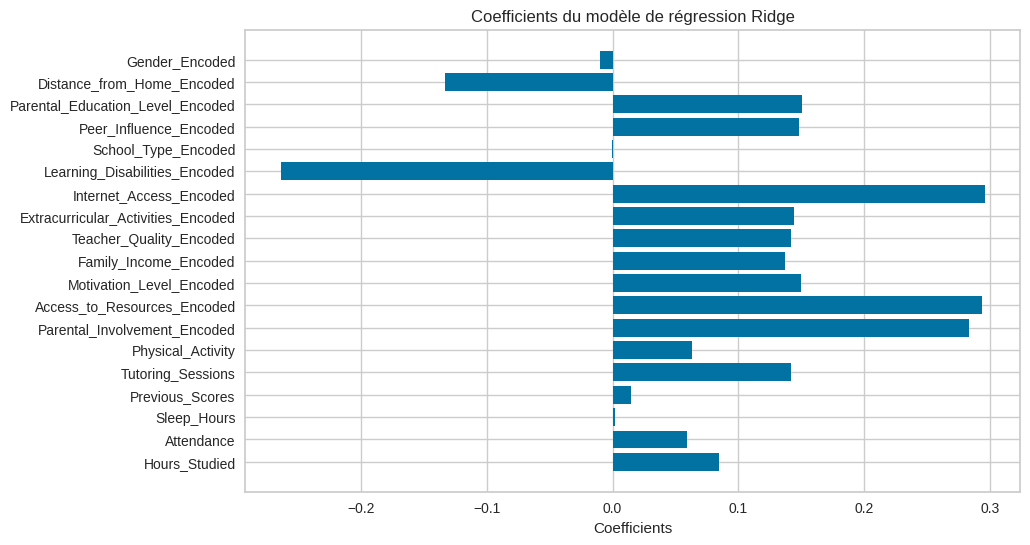

In [21]:

from sklearn.model_selection import cross_val_score
# Entra√Ænement du mod√®le Ridge avec le meilleur alpha trouv√©
ridge = Ridge(alpha=best_alpha)

# Effectuer une validation crois√©e √† 5 plis pour √©valuer les performances du mod√®le
cv_scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

# R√©sultats de la validation crois√©e
print(f"Validation Crois√©e - MSE moyen: {-np.mean(cv_scores_mse)}")
print(f"Validation Crois√©e - R^2 moyen: {np.mean(cv_scores_r2)}")

# Entra√Æner √† nouveau sur l'ensemble complet pour obtenir les r√©sultats sur l'ensemble d'entra√Ænement et de test
ridge.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble d'entra√Ænement et de test
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculer les MSE et R^2 pour l'entra√Ænement et le test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les r√©sultats de l'entra√Ænement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Creating a bar plot to visualize coefficients
coefficients = ridge.coef_.ravel()  # Flatten the coefficients array
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du mod√®le de r√©gression Ridge')
plt.show()

Le mod√®le Ridge pr√©sente des r√©sultats solides avec un MSE moyen de 0.0966 lors de la validation crois√©e, et un R¬≤ moyen de 0.903, ce qui indique une bonne capacit√© de g√©n√©ralisation. Les performances sur l'ensemble d'entra√Ænement (MSE de 0.0955, R¬≤ de 0.904) et sur l'ensemble de test (MSE de 0.0917, R¬≤ de 0.910) confirment que le mod√®le offre des pr√©dictions pr√©cises et coh√©rentes.

# **Regressionn de LASSO**

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)#Alpha=1
lasso.fit(X_train, y_train)

Lasso()

In [25]:
# Pr√©dictions sur l'ensemble d'entra√Ænement et de test
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les r√©sultats de l'entra√Ænement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Train MSE: 0.3164794758398285
Test MSE: 0.3280644751146426
Train R^2: 0.6835205241601715
Test R^2: 0.6790254703418296


Le mod√®le Lasso pr√©sente des r√©sultats moins performants par rapport au mod√®le Ridge, avec un MSE d'entra√Ænement de 0.316 et un MSE de test de 0.328, ce qui indique un plus grand √©cart entre les pr√©dictions du mod√®le et les valeurs r√©elles. Le R¬≤ est √©galement plus faible, atteignant 0.684 pour l'entra√Ænement et 0.679 pour le test, sugg√©rant que le mod√®le explique moins de variance dans les donn√©es par rapport au mod√®le Ridge.

# **Tuning des hyperparam√®tres-LASSO**

In [26]:


# G√©n√©rer un intervalle de valeurs pour alpha
alpha_values = np.linspace(0.01, 10, 50)  # Valeurs entre 0.01 et 10

# Initialiser les variables pour stocker les meilleurs r√©sultats
best_alpha_lasso = None
best_mse_lasso = float('inf')

# Tester chaque valeur d'alpha
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Pr√©dictions sur le jeu de test
    y_test_pred_lasso = lasso.predict(X_test)

    # Calcul du MSE sur le jeu de test
    mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    print(f"Alpha: {alpha:.2f}, Test MSE: {mse_lasso:.4f}")

    # Mettre √† jour le meilleur alpha si n√©cessaire
    if mse_lasso < best_mse_lasso:
        best_mse_lasso = mse_lasso
        best_alpha_lasso = alpha

# R√©sultats finaux
print(f"Meilleur alpha pour  Lasso: {best_alpha_lasso:.2f}, Meilleur Test MSE pour  Lasso: {best_mse_lasso:.4f}")


Alpha: 0.01, Test MSE: 0.0965
Alpha: 0.21, Test MSE: 0.2821
Alpha: 0.42, Test MSE: 0.2890
Alpha: 0.62, Test MSE: 0.2994
Alpha: 0.83, Test MSE: 0.3133
Alpha: 1.03, Test MSE: 0.3308
Alpha: 1.23, Test MSE: 0.3518
Alpha: 1.44, Test MSE: 0.3763
Alpha: 1.64, Test MSE: 0.4044
Alpha: 1.84, Test MSE: 0.4359
Alpha: 2.05, Test MSE: 0.4710
Alpha: 2.25, Test MSE: 0.5096
Alpha: 2.46, Test MSE: 0.5518
Alpha: 2.66, Test MSE: 0.5975
Alpha: 2.86, Test MSE: 0.6400
Alpha: 3.07, Test MSE: 0.6503
Alpha: 3.27, Test MSE: 0.6599
Alpha: 3.48, Test MSE: 0.6701
Alpha: 3.68, Test MSE: 0.6809
Alpha: 3.88, Test MSE: 0.6924
Alpha: 4.09, Test MSE: 0.7045
Alpha: 4.29, Test MSE: 0.7172
Alpha: 4.50, Test MSE: 0.7306
Alpha: 4.70, Test MSE: 0.7447
Alpha: 4.90, Test MSE: 0.7594
Alpha: 5.11, Test MSE: 0.7747
Alpha: 5.31, Test MSE: 0.7907
Alpha: 5.51, Test MSE: 0.8073
Alpha: 5.72, Test MSE: 0.8245
Alpha: 5.92, Test MSE: 0.8424
Alpha: 6.13, Test MSE: 0.8609
Alpha: 6.33, Test MSE: 0.8801
Alpha: 6.53, Test MSE: 0.9000
Alpha: 6.7

## **Mod√®le avec notre Best_alpha**


Train MSE: 0.10030892941900742
Test MSE: 0.0964735148399511
Train R^2: 0.8996910705809926
Test R^2: 0.9056114166600853


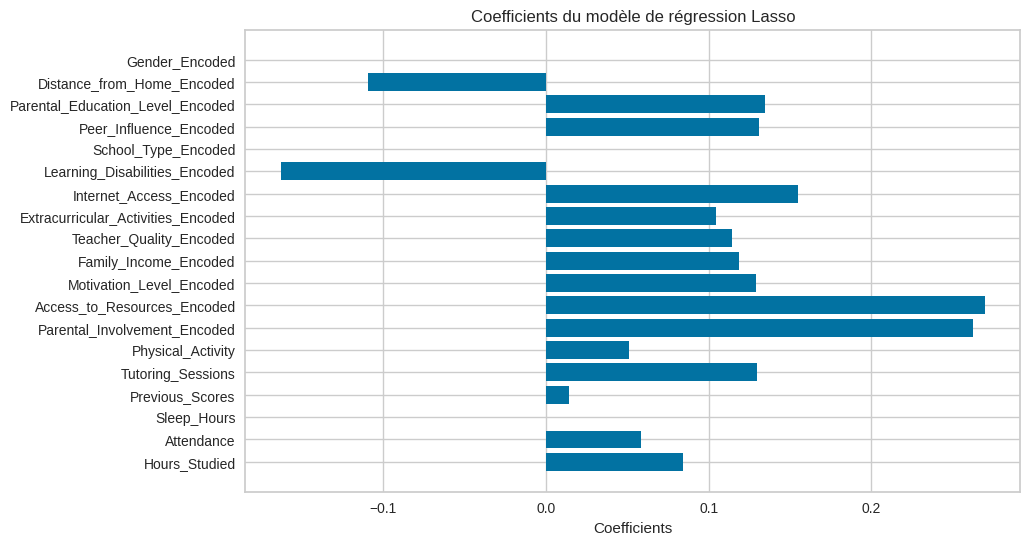

In [27]:
# Entra√Æner Lasso avec le meilleur alpha trouv√©
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)

# Obtenir les coefficients
coefficients_lasso = lasso_best.coef_
lasso_best.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble d'entra√Ænement et de test
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les r√©sultats de l'entra√Ænement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients_lasso)), coefficients_lasso, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du mod√®le de r√©gression Lasso')
plt.show()


**Validation crois√©e LASSO**

In [28]:


# Entra√Æner Lasso avec le meilleur alpha trouv√©
lasso_best = Lasso(alpha=best_alpha_lasso)

# Effectuer une validation crois√©e √† 5 plis pour √©valuer les performances du mod√®le
cv_scores_mse = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='r2')

# R√©sultats de la validation crois√©e
print(f"Validation Crois√©e - MSE moyen: {-np.mean(cv_scores_mse)}")
print(f"Validation Crois√©e - R^2 moyen: {np.mean(cv_scores_r2)}")

# Entra√Æner √† nouveau sur l'ensemble complet pour obtenir les r√©sultats sur l'ensemble d'entra√Ænement et de test
lasso_best.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble d'entra√Ænement et de test
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

# Calculer les MSE et R^2 pour l'entra√Ænement et le test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les r√©sultats de l'entra√Ænement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Validation Crois√©e - MSE moyen: 0.10142725580050165
Validation Crois√©e - R^2 moyen: 0.8984641066677428
Train MSE: 0.10030892941900742
Test MSE: 0.0964735148399511
Train R^2: 0.8996910705809926
Test R^2: 0.9056114166600853


Apr√®s la validation crois√©e et l'optimisation des hyperparam√®tres, le mod√®le Lasso pr√©sente des am√©liorations significatives. Le MSE moyen de la validation crois√©e est de 0.101, avec un R¬≤ moyen de 0.898, indiquant une bonne capacit√© du mod√®le √† pr√©dire les donn√©es. Les performances sur l'ensemble d'entra√Ænement montrent un MSE de 0.100 et un R¬≤ de 0.900, tandis que sur l'ensemble de test, le MSE est de 0.096 et le R¬≤ atteint 0.906, ce qui montre une excellente capacit√© de g√©n√©ralisation du mod√®le.

# **ELASTIC-NET**

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Entra√Æner Elastic Net avec les meilleurs param√®tres
elastic = ElasticNet(alpha=best_alpha, l1_ratio=1.0)
elastic.fit(X_train, y_train)

# Pr√©dictions
y_train_pred = elastic.predict(X_train)
y_test_pred = elastic.predict(X_test)

# Calcul des MSE et R¬≤ pour l'ensemble d'entra√Ænement et de test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R¬≤: {r2_train}")
print(f"Test R¬≤: {r2_test}")

Train MSE: 0.23510066129368534
Test MSE: 0.23653617480675496
Train R¬≤: 0.7648993387063147
Test R¬≤: 0.7685757123528543


Le mod√®le Elastic Net montre des performances int√©ressantes avec un MSE d'entra√Ænement de 0.235 et un MSE de test de 0.237, ce qui indique que le mod√®le est relativement stable entre l'entra√Ænement et le test. Le R¬≤ sur l'ensemble d'entra√Ænement est de 0.765, et sur l'ensemble de test, il atteint 0.769. Cela sugg√®re que le mod√®le est capable de capturer une grande partie de la variance dans les donn√©es, avec une performance similaire sur les donn√©es de test et d'entra√Ænement.

# **Tuning des hyperparam√®tres-ELASTIC-NET et Validations crois√©es**

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# D√©finir une grille de recherche pour les hyperparam√®tres
param_grid = {
    'alpha': np.linspace(0.01, 10, 50),  # R√©gularisation globale
    'l1_ratio': np.linspace(0.1, 0.9, 10)  # Proportion de L1 (Lasso) vs L2 (Ridge)
}

# Initialiser Elastic Net
elastic_net = ElasticNet()

# Recherche de grille avec validation crois√©e
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparam√®tres
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f"Meilleur alpha: {best_alpha}")
print(f"Meilleur l1_ratio: {best_l1_ratio}")

# Entra√Æner Elastic Net avec les meilleurs param√®tres
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_best.fit(X_train, y_train)

# Pr√©dictions
y_train_pred = elastic_net_best.predict(X_train)
y_test_pred = elastic_net_best.predict(X_test)

# Calcul des MSE et R¬≤ pour l'ensemble d'entra√Ænement et de test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Validation crois√©e : MSE moyen et R¬≤ moyen
cv_mse_scores = cross_val_score(elastic_net_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(elastic_net_best, X_train, y_train, cv=5, scoring='r2')

cv_mse_mean = -np.mean(cv_mse_scores)  # Prendre la valeur absolue car MSE est n√©gatif dans scoring
cv_r2_mean = np.mean(cv_r2_scores)

# Afficher les r√©sultats
print("\n### R√©sultats Elastic Net ###")
print(f"Validation Crois√©e - MSE moyen: {cv_mse_mean}")
print(f"Validation Crois√©e - R¬≤ moyen: {cv_r2_mean}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R¬≤: {r2_train}")
print(f"Test R¬≤: {r2_test}")


Meilleur alpha: 0.01
Meilleur l1_ratio: 0.1

### R√©sultats Elastic Net ###
Validation Crois√©e - MSE moyen: 0.09699350829050557
Validation Crois√©e - R¬≤ moyen: 0.9029176374688275
Train MSE: 0.09593498758672471
Test MSE: 0.09217798141289361
Train R¬≤: 0.9040650124132753
Test R¬≤: 0.9098141174276674


Apr√®s la validation crois√©e et l'optimisation des hyperparam√®tres, le mod√®le Elastic Net pr√©sente une am√©lioration notable. Le MSE moyen de la validation crois√©e est de 0.097, avec un R¬≤ moyen de 0.903, ce qui montre une bonne capacit√© √† g√©n√©raliser. Les performances sur les ensembles d'entra√Ænement et de test sont √©galement tr√®s solides, avec un MSE respectivement de 0.096 et 0.092, et un R¬≤ de 0.904 pour l'entra√Ænement et de 0.910 pour le test. Ces r√©sultats sugg√®rent que le mod√®le est bien √©quilibr√©, offrant une bonne pr√©cision et une faible erreur de g√©n√©ralisation.

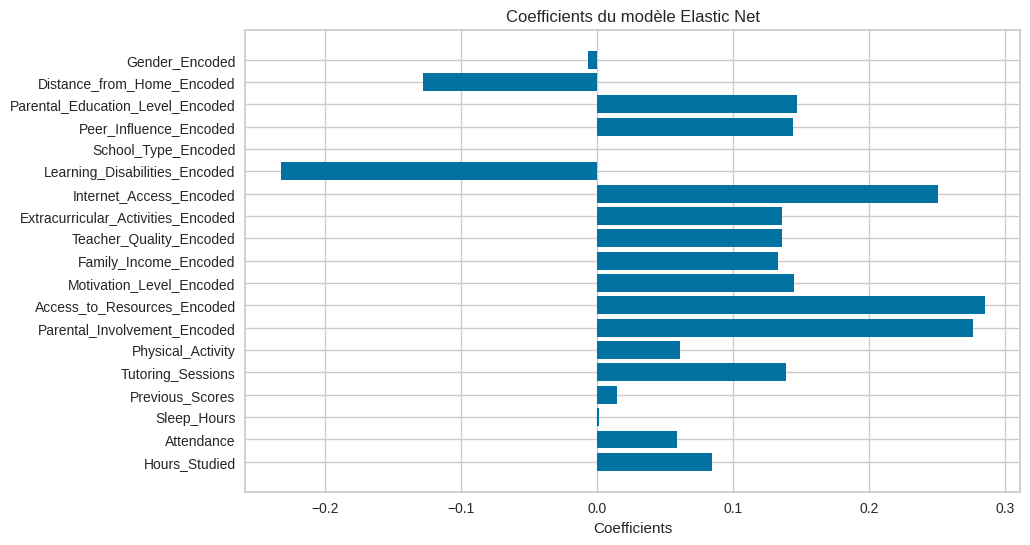

In [33]:
# Visualisation des coefficients
coefficients_elastic_net = elastic_net_best.coef_

plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients_elastic_net)), coefficients_elastic_net, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du mod√®le Elastic Net')
plt.show()


# **Mod√©le non lineaire**

KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciation du mod√®le
knn = KNeighborsRegressor(n_neighbors=5)

# Entra√Ænement du mod√®le
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Pr√©dictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# √âvaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R^2: {r2_train}, Test R^2: {r2_test}")


Train MSE: 0.16901855079183975, Test MSE: 0.2410135553774125
Train R^2: 0.8309814492081602, Test R^2: 0.764195094420159


# **Tuning des hyperparam√®tres-KNN**

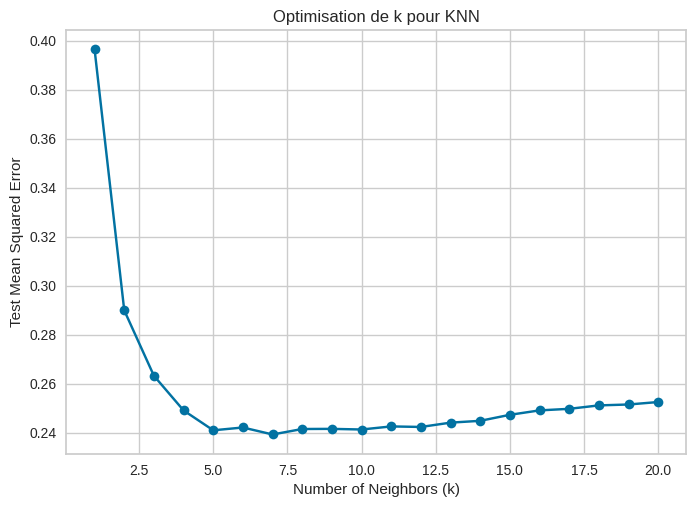

In [36]:
errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_test_pred))

# Visualisation de l'erreur en fonction de k
import matplotlib.pyplot as plt

plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Mean Squared Error")
plt.title("Optimisation de k pour KNN")
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-scores))

# Meilleur k
best_k = k_values[np.argmin(cv_scores)]
print(f"Meilleur k selon la validation crois√©e: {best_k}")
cv_scores

Meilleur k selon la validation crois√©e: 12


[0.4316683228096216,
 0.32227664769545816,
 0.28648413568429926,
 0.2695256981111436,
 0.2642311649921246,
 0.2577304699103795,
 0.2560963317556452,
 0.25405832731122724,
 0.25213799023110056,
 0.2514647352017424,
 0.2510243930247939,
 0.2510030950528965,
 0.25238116630111623,
 0.25312183523032394,
 0.2531928048261051,
 0.2536960444982622,
 0.2538505872758826,
 0.253797694150573,
 0.2539339969065358,
 0.25422960936112776]

# **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# Initialisation du mod√®le
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Entra√Ænement du mod√®le
rf.fit(X_train, y_train)

# Pr√©dictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# √âvaluation des performances
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R^2: {r2_train}, Test R^2: {r2_test}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 0.023674831806560662, Test MSE: 0.16125519505771269
Train R^2: 0.9763251681934393, Test R^2: 0.842229761785397


Le mod√®le Random Forest montre une forte capacit√© de pr√©diction sur l'ensemble d'entra√Ænement, avec un MSE de 0.0237 et un R¬≤ de 0.9763, ce qui indique un excellent ajustement aux donn√©es d'entra√Ænement. Cependant, sur l'ensemble de test, les performances se d√©gradent l√©g√®rement, avec un MSE de 0.1613 et un R¬≤ de 0.8422.

# **Tuning des hyperparam√®tres-Random Forest et validation crois√©e**


In [39]:
param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [40]:
# Initialiser le mod√®le
rf = RandomForestRegressor(random_state=42)

# Configurer RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Nombre d'it√©rations
    cv=5,  # Validation crois√©e √† 5 plis
    scoring='r2',  # √âvaluer avec le R^2
    random_state=42,
    n_jobs=-1  # Utilisation de tous les c≈ìurs disponibles
)

# Ajuster le mod√®le
random_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='r2')

In [41]:
# Meilleur mod√®le
best_rf = random_search.best_estimator_

In [42]:
# Validation crois√©e R^2 moyen
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2_rf = cv_scores_rf.mean()
std_cv_r2_rf = cv_scores_rf.std()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

## **Rentrainement du mod√®le avec les meilleurs parametre**

In [43]:
# R√©entra√Æner le mod√®le sur les donn√©es d'entra√Ænement
best_rf.fit(X_train, y_train)

# Pr√©dictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# √âvaluation
print(f"Validation crois√©e - R¬≤ moyen: {mean_cv_r2_rf:.4f}")
print(f"Validation crois√©e - √âcart-type R¬≤: {std_cv_r2_rf:.4f}")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation crois√©e - R¬≤ moyen: 0.8222
Validation crois√©e - √âcart-type R¬≤: 0.0059
Train MSE: 0.023337100926587192
Test MSE: 0.17414868213923815
Train R^2: 0.9766628990734129
Test R^2: 0.8296149215159648



Apr√®s optimisation et validation crois√©e, le mod√®le Random Forest montre une excellente performance sur l'ensemble d'entra√Ænement avec un MSE de 0.0233 et un R¬≤ de 0.9767, ce qui indique un tr√®s bon ajustement aux donn√©es d'entra√Ænement. Toutefois, sur l'ensemble de test, les performances sont moins bonnes avec un MSE de 0.1741 et un R¬≤ de 0.8296. Cela sugg√®re une l√©g√®re perte de capacit√© √† g√©n√©raliser, bien que le mod√®le reste globalement performant. La validation crois√©e r√©v√®le une stabilit√© acceptable avec un R¬≤ moyen de 0.8222 et un faible √©cart-type, ce qui indique que le mod√®le est relativement robuste.

# **BOOSTING**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du mod√®le Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entra√Ænement sur les donn√©es d'entra√Ænement
gbr.fit(X_train, y_train)

# Pr√©dictions sur le jeu d'entra√Ænement et de test
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# √âvaluation avec MSE et R^2
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Train MSE: 0.09168806402159088
Test MSE: 0.11998386209891053
Train R^2: 0.9083119359784091
Test R^2: 0.8826091618414015


Le mod√®le de boosting montre de tr√®s bonnes performances sur l'ensemble d'entra√Ænement avec un MSE de 0.0917 et un R¬≤ de 0.9083, ce qui indique une bonne capacit√© d'ajustement aux donn√©es d'entra√Ænement. Sur l'ensemble de test, les performances sont l√©g√®rement moins bonnes avec un MSE de 0.1200 et un R¬≤ de 0.8826, ce qui sugg√®re une l√©g√®re perte de g√©n√©ralisation.

## **Validation crois√©e Boosting**

In [45]:

from sklearn.model_selection import cross_val_score

# Initialisation du mod√®le Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
cv_r2_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='r2')

# Validation crois√©e √† 5 plis
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_squared_error')



# Affichage des r√©sultats
print(f"MSE moyen de la validation crois√©e (5 plis) : {-cv_scores.mean()}")
print(f"√âcart-type de MSE : {cv_scores.std()}")


# Pr√©dictions sur l'ensemble de test
gbr.fit(X_train, y_train)  # On r√©entra√Æne le mod√®le sur l'ensemble complet d'entra√Ænement
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# √âvaluation avec MSE et R^2 pour l'ensemble d'entra√Ænement et de test
print(f"R^2 moyen de la validation crois√©e (5 plis) : {cv_r2_scores.mean():.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

MSE moyen de la validation crois√©e (5 plis) : 1.2430128863873904
√âcart-type de MSE : 0.08966137165488562


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


R^2 moyen de la validation crois√©e (5 plis) : 0.8754
Train MSE: 0.09168806402159088
Test MSE: 0.11998386209891053
Train R^2: 0.9083119359784091
Test R^2: 0.8826091618414015


Le mod√®le de boosting pr√©sente un R¬≤ moyen de 0.8754 lors de la validation crois√©e, indiquant une bonne capacit√© de g√©n√©ralisation. Sur l'ensemble d'entra√Ænement, le mod√®le obtient un MSE de 0.0917 et un R¬≤ de 0.9083, ce qui montre un bon ajustement aux donn√©es d'entra√Ænement.

# **CHOIX DU MODELE**

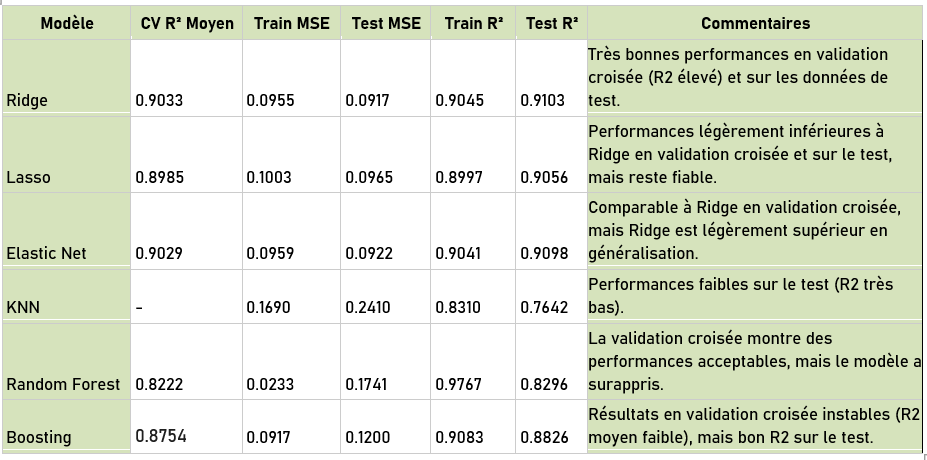

## **Analyse des mod√®les**

**Ridge Regression :**

Score moyen en validation crois√©e
***ùëÖ2=0.9033*** le plus √©lev√© parmi tous les mod√®les, indiquant une tr√®s bonne g√©n√©ralisation.

Performances solides sur les donn√©es de test (
***ùëÖ2=0.9103***), confirmant la stabilit√© du mod√®le.

**Lasso et Elastic Net :**

R√©sultats proches de Ridge, mais l√©g√®rement inf√©rieurs en validation crois√©e et sur le test. Si la r√©gularisation suppl√©mentaire est critique, ces mod√®les peuvent √™tre envisag√©s.

**Random Forest :**

Validation crois√©e moyenne (***ùëÖ2=0.8222***), indiquant une certaine capacit√© √† g√©n√©raliser. Toutefois, le mod√®le souffre d‚Äôun surapprentissage marqu√© (
***ùëÖ2*** √©lev√© sur l‚Äôentra√Ænement, faible sur le test).

**Boosting :**

Validation crois√©e montre une instabilit√© (MSE moyen tr√®s √©lev√©). Cependant, le mod√®le performe bien sur les donn√©es de test (
***ùëÖ2=0.8826***), sugg√©rant une utilit√© limit√©e selon le contexte.

### **Meilleur mod√®le : Ridge Regression**
Le Ridge Regression se distingue par ses :

Excellentes performances en validation crois√©e (
ùëÖ2=0.9033).

Tr√®s bons r√©sultats sur le test (
ùëÖ2=0.9103), garantissant une g√©n√©ralisation optimale.

# **Importance des variables- RIDGE**

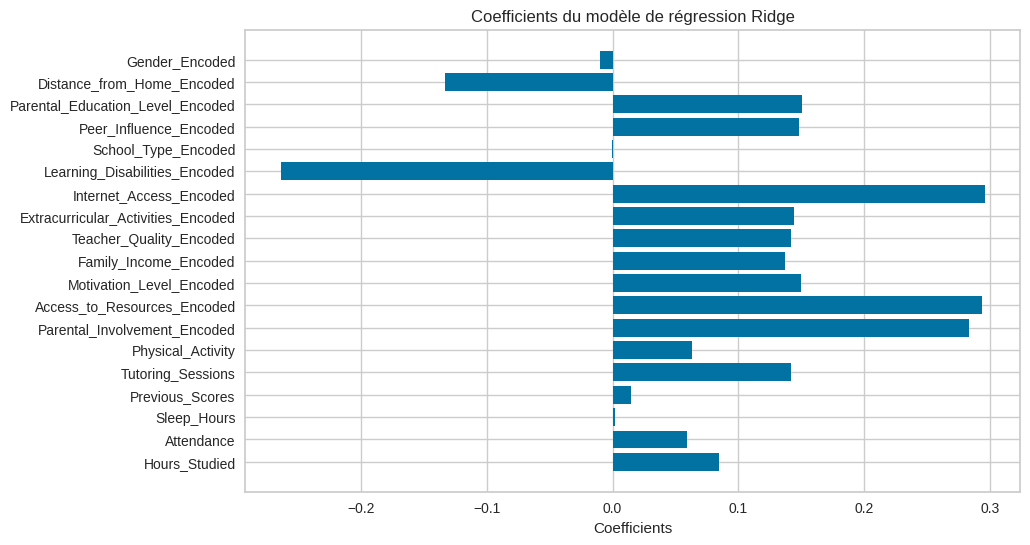

In [46]:
# Creating a bar plot to visualize coefficients
coefficients = ridge.coef_.ravel()  # Flatten the coefficients array
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du mod√®le de r√©gression Ridge')
plt.show()

### **Selection des variables les plus essentielles**

Pour le d√©ploiement de notre mod√®le, nous allons selectionner les variables qui ont un coefficient sup√©rieur a 0.10. Apr√®s cela, nous allons reentrain nos mod√®le pour voir si le mod√©le Ridge sera toujours le plus performant et robuste.

Variables s√©lectionn√©es avec un seuil de 0.1:
                              Variable  Coefficient
4                    Tutoring_Sessions     0.141508
6         Parental_Involvement_Encoded     0.283524
7          Access_to_Resources_Encoded     0.293395
8             Motivation_Level_Encoded     0.149461
9                Family_Income_Encoded     0.136903
10             Teacher_Quality_Encoded     0.141870
11  Extracurricular_Activities_Encoded     0.144456
12             Internet_Access_Encoded     0.296062
13       Learning_Disabilities_Encoded    -0.263821
15              Peer_Influence_Encoded     0.148148
16    Parental_Education_Level_Encoded     0.150471
17          Distance_from_Home_Encoded    -0.132973


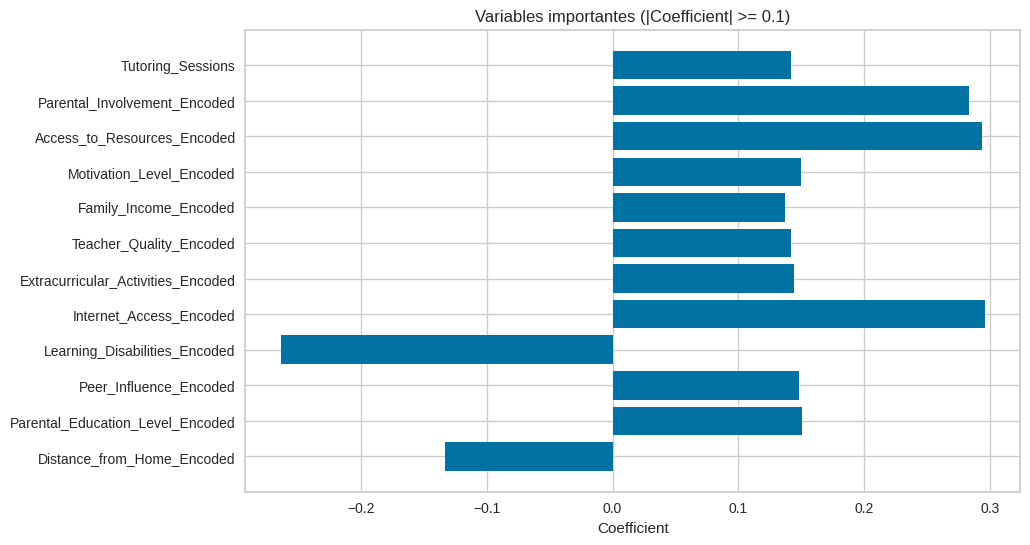

In [50]:
# Choix du seuil
seuil = 0.10  #  pour s√©lectionner les variables ayant |Coefficient| >= 0.10

# Calcul des coefficients et des noms des variables
coefficients = ridge.coef_.ravel()  # Aplatir si n√©cessaire
feature_names = X_train.columns

# Associer les noms des variables et leurs coefficients dans un DataFrame
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})

# Filtrer les variables bas√©es sur le seuil
importance_df['Importance'] = importance_df['Coefficient'].abs()
selected_features = importance_df[importance_df['Importance'] >= seuil]

# Affichage des variables s√©lectionn√©es
print(f"Variables s√©lectionn√©es avec un seuil de {seuil}:")
print(selected_features[['Variable', 'Coefficient']])

# Visualisation des variables s√©lectionn√©es
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Variable'], selected_features['Coefficient'])
plt.xlabel('Coefficient')
plt.title(f'Variables importantes (|Coefficient| >= {seuil})')
plt.gca().invert_yaxis()
plt.show()


**Reentraiment de notre modele Ridge avec ces variables**

In [51]:
# Liste des colonnes retenues
selected_columns = [
    'Tutoring_Sessions',
    'Parental_Involvement_Encoded',
    'Access_to_Resources_Encoded',
    'Motivation_Level_Encoded',
    'Family_Income_Encoded',
    'Teacher_Quality_Encoded',
    'Extracurricular_Activities_Encoded',
    'Internet_Access_Encoded',
    'Learning_Disabilities_Encoded',
    'Peer_Influence_Encoded',
    'Parental_Education_Level_Encoded',
    'Distance_from_Home_Encoded'
]

# Filtrer les donn√©es
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]


In [52]:

best_alpha=0.10
# Initialiser le mod√®le Ridge avec le meilleur alpha
ridge_retrained = Ridge(alpha=best_alpha)  # Remplacez `best_alpha` par votre valeur trouv√©e

# R√©entra√Æner le mod√®le
ridge_retrained.fit(X_train_selected, y_train)

# Pr√©dictions
y_train_pred = ridge_retrained.predict(X_train_selected)
y_test_pred = ridge_retrained.predict(X_test_selected)


In [54]:


# Calcul des m√©triques
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des r√©sultats
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Train MSE: 0.8330314609913633
Test MSE: 0.8655530276027145
Train R^2: 0.16696853900863673
Test R^2: 0.15315281902466915


In [62]:


# Validation crois√©e pour MSE
cv_scores_mse = cross_val_score(ridge_retrained, X_train_selected, y_train,
                                 scoring='neg_mean_squared_error', cv=5)

# Validation crois√©e pour R¬≤
cv_scores_r2 = cross_val_score(ridge_retrained, X_train_selected, y_train,
                               scoring='r2', cv=5)

# Affichage des r√©sultats
print(f"MSE moyen de la validation crois√©e : {-cv_scores_mse.mean()}")
print(f"√âcart-type du MSE : {cv_scores_mse.std()}")
print(f"R¬≤ moyen de la validation crois√©e : {cv_scores_r2.mean()}")
print(f"√âcart-type du R¬≤ : {cv_scores_r2.std()}")


MSE moyen de la validation crois√©e : 0.8381983315566371
√âcart-type du MSE : 0.016141727809390875
R¬≤ moyen de la validation crois√©e : 0.161066088893219
√âcart-type du R¬≤ : 0.008305485495629506


Les r√©sultats de la validation crois√©e du mod√®le Ridge montrent un MSE moyen de 0.8382, ce qui indique une erreur relativement √©lev√©e sur les donn√©es de validation, sugg√©rant une capacit√© limit√©e √† pr√©dire avec pr√©cision. Le R¬≤ moyen de 0.1611 est faible, ce qui signifie que le mod√®le explique peu de la variance des donn√©es de validation, malgr√© des performances raisonnables sur les ensembles d'entra√Ænement et de test. L'√©cart-type du MSE (0.0161) et du R¬≤ (0.0083) √©tant faibles, cela indique une stabilit√© des r√©sultats √† travers les plis de validation. Cependant, cette faible performance en validation met en √©vidence des difficult√©s de g√©n√©ralisation du mod√®le.

**Reentraiment de notre modele Lasso avec ces variables**

In [59]:

# Initialiser le mod√®le LASSO avec le meilleur alpha
lasso_retrained = Lasso(alpha=0.01, max_iter=10000)
# R√©entra√Æner le mod√®le
lasso_retrained.fit(X_train_selected, y_train)

# Pr√©dictions
y_train_pred = lasso_retrained.predict(X_train_selected)
y_test_pred = lasso_retrained.predict(X_test_selected)


In [60]:

# Calcul des m√©triques
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des r√©sultats
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Train MSE: 0.8376137008991348
Test MSE: 0.8690091137100019
Train R^2: 0.16238629910086522
Test R^2: 0.14977142391214726


**Validation crois√©e Lasso**

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Cr√©er le mod√®le LASSO avec le meilleur alpha
lasso_retrained = Lasso(alpha=best_alpha_lasso, max_iter=10000)

# Validation crois√©e pour MSE
cv_mse_scores = cross_val_score(lasso_retrained, X_train_selected, y_train,
                                 scoring='neg_mean_squared_error', cv=5)

# Validation crois√©e pour R^2
cv_r2_scores = cross_val_score(lasso_retrained, X_train_selected, y_train,
                                scoring='r2', cv=5)

# Affichage des r√©sultats de la validation crois√©e
print(f"MSE moyen de la validation crois√©e : {-cv_mse_scores.mean()}")
print(f"√âcart-type de MSE : {cv_mse_scores.std()}")
print(f"R¬≤ moyen de la validation crois√©e : {cv_r2_scores.mean()}")
print(f"√âcart-type de R¬≤ : {cv_r2_scores.std()}")


MSE moyen de la validation crois√©e : 0.8427666894365284
√âcart-type de MSE : 0.017354929085185936
R¬≤ moyen de la validation crois√©e : 0.15652875084025308
√âcart-type de R¬≤ : 0.006951487501648368


Le mod√®le **LASSO** apr√®s la s√©lection des variables pertinentes a montr√© des performances relativement limit√©es en validation crois√©e. Le MSE moyen de 0.8428 indique une erreur quadratique moyenne √©lev√©e, sugg√©rant que le mod√®le peine √† faire des pr√©dictions pr√©cises. Le R¬≤ moyen de 0.1565 indique que seulement 15,65 % de la variance des donn√©es cibles est expliqu√©e par le mod√®le, ce qui est un score relativement faible. L'√©cart-type du MSE (0.0173) et du R¬≤ (0.00695) montre une certaine stabilit√© des performances √† travers les plis, mais la capacit√© de g√©n√©ralisation reste insuffisante.

# **finalement est ce qu'on ne va pas mettre toutes les variables pour la pr√©diction ?**